## Historic Redlining Maps
### Team Code & Cry

In this notebook, we've pulled together the geographic data and boundaries from historic redlining maps, per the [Mapping Inequality Project](https://dsl.richmond.edu/panorama/redlining/#loc=13/37.76/-122.445&city=san-francisco-ca). Although this notebook mainly recreates existing redlining maps, it does so in a way that is more interactive and can be used in conjunction with other data sets throughout the entirety of our project. Additionally, it allows us to situate historically redlined areas within the context of current neighborhood boundaries.

As seen below, we start by simply processing and visualizing the original boundaries of redlined areas within San Francisco. Then, based on work done by the Mapping Inequality Project to assign these redlined boundaries to 2020 census tracts, we create interactive redlining maps that can be used to figure out how larger neighborhood groups were graded within the context of the original HOLC redlining maps.

In [2]:
#importing libraries
import pandas as pd
import geopandas as gpd

In [4]:
#bringing in the file with historic redlining boundaries in SF
redline=gpd.read_file('data/sfredlined.geojson')

In [5]:
redline.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'1': 'This area consists of 35 irregularly-sh...,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,None,A10,A,{'1': 'This area of 25 irregularly-shaped bloc...,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,None,A11,A,"{'1': 'This area, with the exception of the tw...","MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,None,A12,A,"{'1': 'This area, consisting of some 20 blocks...","MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,None,A13,A,{'1': 'This area of some 25 irregularly-shaped...,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


<AxesSubplot: >

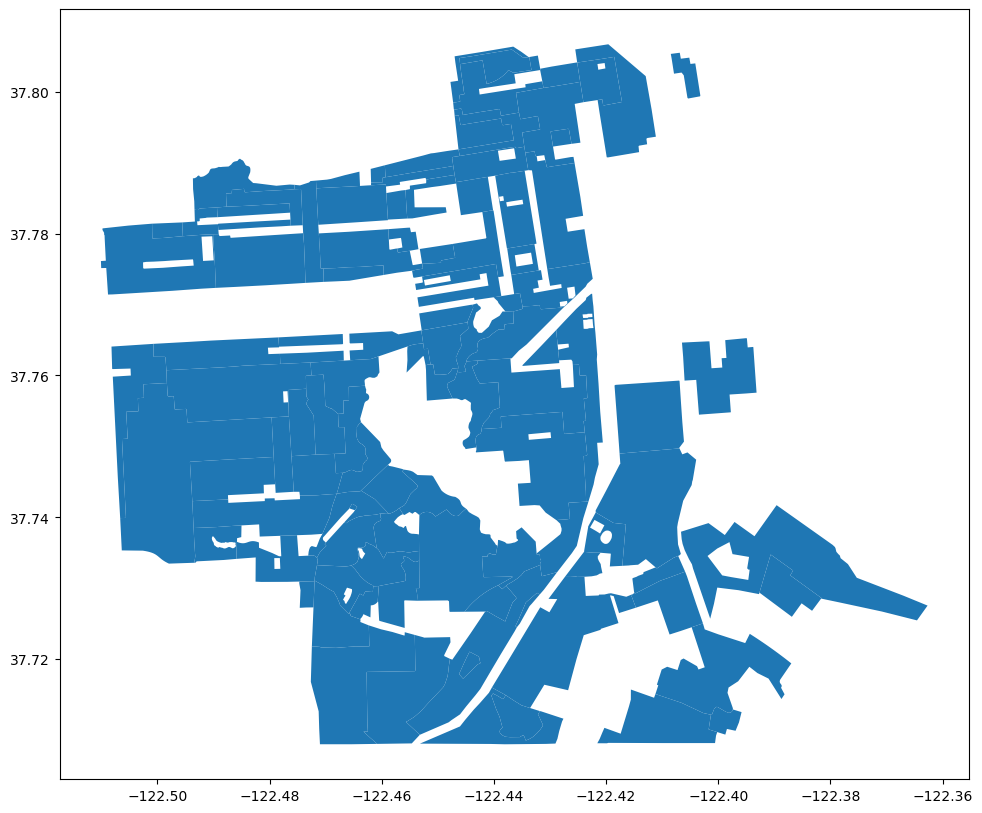

In [6]:
# plot it to help get a general sense of where historically redlined areas are within the city
redline.plot(figsize=(12,10))

In [7]:
# tell me more about this dataset
redline.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   0 non-null      object  
 1   holc_id                95 non-null     object  
 2   holc_grade             97 non-null     object  
 3   area_description_data  97 non-null     object  
 4   geometry               97 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 3.9+ KB


It looks like there are 95 defined areas within the old redlining map that have an HOLC ID, grade, and description. Let's learn a bit more: 

In [8]:
# learning more about the 'HOLC Grade' column
redline['holc_grade'].describe()

count     97
unique     4
top        B
freq      36
Name: holc_grade, dtype: object

It seems that 'B' was the most frequent grade given to areas within the city. I wonder how many areas fall within the other three grades?

In [9]:
#seeing how many areas fall within each grade, from A to D
redline['holc_grade'].value_counts()

B    36
C    31
D    17
A    13
Name: holc_grade, dtype: int64

In [10]:
# now let's create a dataframe with a specific subset of the columns that I identified earlier
redline = redline[['holc_grade', 'geometry']]
redline.head()

,holc_grade,geometry
0,A,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,A,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,A,"MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,A,"MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,A,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


## Recreating Old HOLC Redlining Maps

(-122.517426, -122.35530800000001, 37.703080549999996, 37.81161645)

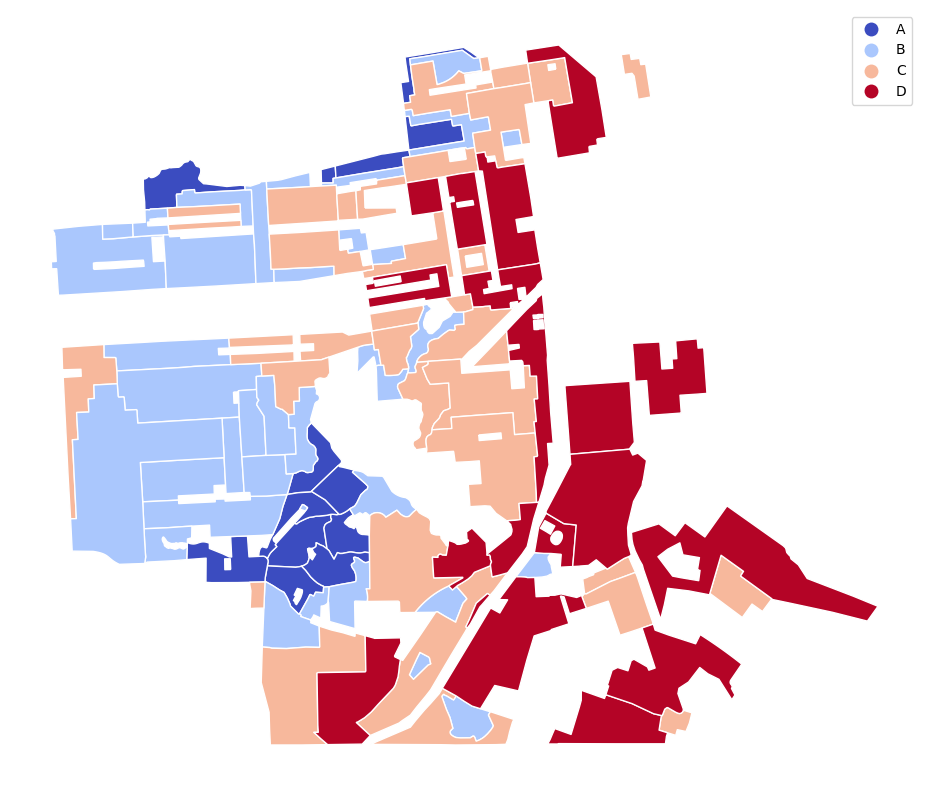

In [11]:
# making a pretty simple plot map that color codes all 95 areas according to the HOLC grade they were given  
ax1 = redline.plot(
        column='holc_grade', 
        figsize=(12,10),
        edgecolor='white',
        legend=True,
        cmap='coolwarm',
        )
ax1.axis('off')

Based on this simple map, we can start to see how redlined areas with a ‘D’ grade (the worst
of the HOLC grades) are concentrated in the east - and primarily the southeast- parts of San
Francisco. This is important context to keep in mind as we assess and visualize different health
equity indicators, and start to figure out which areas of the city experience the greatest levels of
health inequities. Do those negative health outcomes tend to also fall in the southeast corner of
the city? And if so, what does that mean in regards to the lasting implications of redling?

In [12]:
#creating a color dictionary to control the color coding of the map according to grades
#doing this in order to have a map that has grades/colors that match the original HOLC maps
color_dict = {'A': 'green',
              'B': 'blue',
              'C': 'yellow',
              'D': 'red'}

In [15]:
redline['Colors'] = redline['holc_grade'].map(color_dict)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
# double checking that colors assign to grades correctly
redline.sample(3)

,holc_grade,geometry,Colors
70,C,"MULTIPOLYGON (((-122.45889 37.78197, -122.4591...",yellow
19,B,"MULTIPOLYGON (((-122.49838 37.76074, -122.4985...",blue
7,A,"MULTIPOLYGON (((-122.44603 37.80388, -122.4457...",green


(-122.517426, -122.35530800000001, 37.703080549999996, 37.81161645)

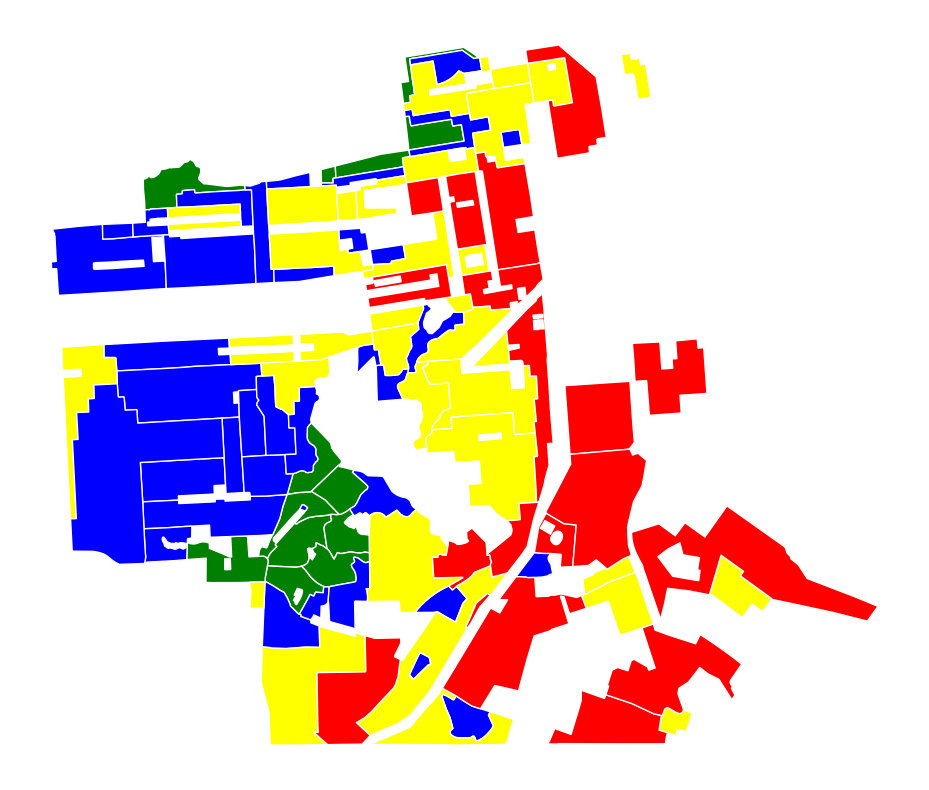

In [17]:
# create the map
ax = redline.plot(color = redline['Colors'],
                figsize=(12,10),
                edgecolor='white',
                legend=True
                 )
ax.axis('off')

In [18]:
# making an interactive map that is a bit easier to understand, complete with a legend showing HOLC grades
redline.explore(
     column="holc_grade", # make choropleth based on "holc grade" column
     tooltip="holc_grade", # show "holc grade" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="coolwarm", # use "coolwarm" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )

## Mapping Redlining to (2020) Census Tract Boundaries

Now that we have visualized the original HOLC map for San Francisco, it’s time to try and retrofit
these redlined areas to 2020 census tracts. Ultimately, the goal is to merge data and create maps
that not only shows the grade assigned to each tract, but the larger neighborhood to which that
grade now applies.

In [19]:
# import libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [20]:
# bringing over the redlining to census tract data from the Mapping Inequality Project github
ct = gpd.read_file("https://raw.githubusercontent.com/americanpanorama/Census_HOLC_Research/main/2020_Census_Tracts/Tracts_2020_HOLC.geojson")

In [21]:
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42074 entries, 0 to 42073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          42074 non-null  int64   
 1   GISJOIN           42074 non-null  object  
 2   neighborho        42074 non-null  int64   
 3   SUM_Perc          42074 non-null  float64 
 4   FIRST_holc_grade  42074 non-null  object  
 5   MAX_state         42074 non-null  object  
 6   MAX_city          42074 non-null  object  
 7   Shape_Length      42074 non-null  float64 
 8   Shape_Area        42074 non-null  float64 
 9   geometry          42074 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 3.2+ MB


Wow, this is a huge file. It seems that the Mapping Inequality Project only lets you bring over
2020 census tract/redlining data for all U.S. cities at the same time.
In a bit, we’ll need ot run a loop so that we’re just working with data from San Francisco, specifically.

In [22]:
#seeing what the data looks like
ct.head(3)

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
0,1,G0100730000100,180,0.092969,D,AL,Birmingham,3336.386272,7.095820e+05,"POLYGON ((-86.71213 33.59389, -86.71218 33.594..."
1,2,G0100730000100,181,0.161693,D,AL,Birmingham,7731.380924,1.234060e+06,"POLYGON ((-86.72188 33.58805, -86.72322 33.589..."
2,3,G0100730000100,182,0.170326,D,AL,Birmingham,6111.241095,1.300062e+06,"POLYGON ((-86.72644 33.56609, -86.73380 33.569..."


In [23]:
# creating a query to just pull redlining/census tract data that falls within San Francisco
ct.query("MAX_city == 'San Francisco'")

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry
4857,4858,G0600750010101,737,0.000273,D,CA,San Francisco,66.821534,190.019325,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
4858,4859,G0600750010101,745,0.023125,C,CA,San Francisco,755.952555,16116.899020,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
4859,4860,G0600750010201,730,0.005193,C,CA,San Francisco,439.611407,970.438770,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."
4860,4861,G0600750010201,732,0.991968,C,CA,San Francisco,1806.228464,185369.402308,"POLYGON ((-122.41816 37.80314, -122.41865 37.8..."
4861,4862,G0600750010201,733,0.002839,C,CA,San Francisco,213.541662,530.455183,"POLYGON ((-122.42479 37.80228, -122.42485 37.8..."
...,...,...,...,...,...,...,...,...,...,...
5467,5468,G0600810600402,790,0.005356,C,CA,San Francisco,520.293627,2155.063525,"POLYGON ((-122.44976 37.70822, -122.45017 37.7..."
5468,5469,G0600810600701,788,0.029118,C,CA,San Francisco,1486.619592,15236.603137,"POLYGON ((-122.46104 37.70824, -122.46129 37.7..."
5469,5470,G0600810600701,789,0.015979,D,CA,San Francisco,1151.050874,8360.211548,"POLYGON ((-122.45452 37.70824, -122.45520 37.7..."
5470,5471,G0600810600701,790,0.000647,C,CA,San Francisco,125.541397,338.527576,"POLYGON ((-122.45248 37.70815, -122.45284 37.7..."


Great, that worked! It looks like there are 526 areas that are fitted to 2020 census tracts in
San Francisco. Let’s try to map them and figure out their rpesective HOLC grade and current
neighborhood:

In [24]:
# create a list of routes
cities = ["San Francisco"]

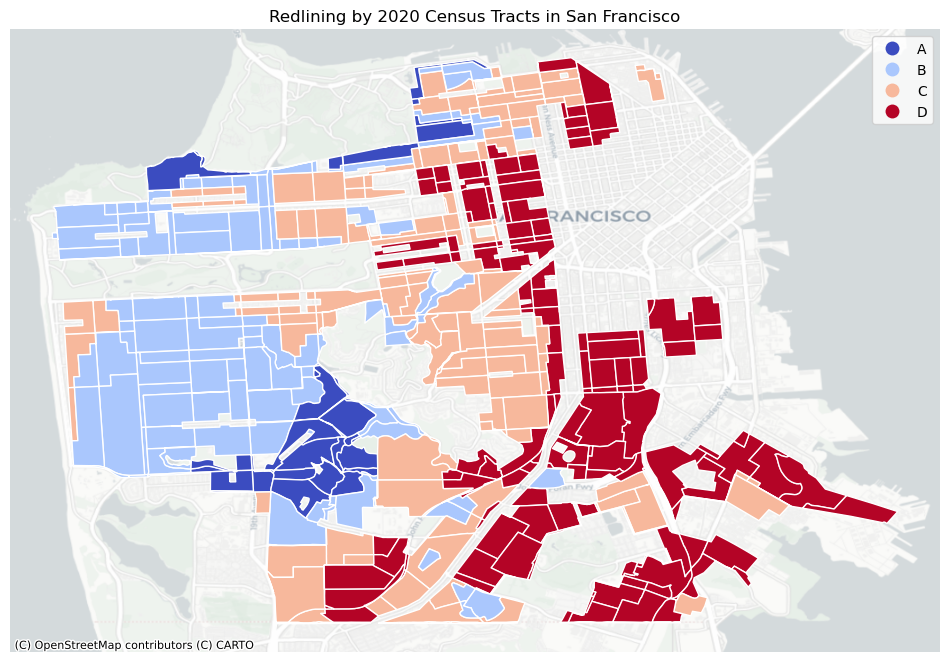

In [25]:
# # creating a color coded map of SF census tracts, according to HOLC grade
for MAX_city in cities:

    # map it
    fig, ax = plt.subplots(figsize=(12,10))

    # map options: notice the query to filter by individual city
    ct[ct.MAX_city == MAX_city].plot(column = 'FIRST_holc_grade',legend=True,
  edgecolor='white',cmap = 'coolwarm',ax=ax)
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Redlining by 2020 Census Tracts in San Francisco')
    
    ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron, crs=4326)

In [26]:
#bringing in the SF Neighborhood Analysis by 2020 Census Tract spatial data from DataSF to merge
nhoods = gpd.read_file('data/SF2020_Neighborhoods_CTs.geojson')

In [27]:
nhoods.head(4)

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
3,9804.01,The Farallones,980401,4,2022-07-08 14:12:00,075,06,1,2022-07-08 21:09:48.141,239,06075980401,"MULTIPOLYGON (((-123.00360 37.69325, -123.0040..."


In [28]:
#dropping the Farrollones census tract because it has messed with our maps in the past
nhoods = nhoods.drop(labels=3, axis=0)

In [29]:
#defining which columns to keep moving forward
columns_to_keep = ['neighborhoods_analysis_boundaries',
                   'tractce']

In [30]:
#looing at the data and columns we've decided to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,neighborhoods_analysis_boundaries,tractce
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501
4,Bayview Hunters Point,061200
5,Chinatown,061102
...,...,...
237,Russian Hill,010901
238,Chinatown,010702
239,North Beach,010401
240,Tenderloin,012204


In [31]:
#renaming the two remaining columns
nhoods2.columns = ['Neighborhood', 
                  'Census Tract',]

In [32]:
#double checking the renamining worked
nhoods2.head(3)

,Neighborhood,Census Tract
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501


In [33]:
#creating a full FIPS code column that matches the formatting of the Mapping Inequality Project data 
#this will enable us to finally merge the two data sets
nhoods2['GISJOIN'] ='G060' + '0750' + nhoods2['Census Tract']

In [34]:
#double checking that the merge worked
nhoods2.head(3)

,Neighborhood,Census Tract,GISJOIN
0,Bayview Hunters Point,980900,G0600750980900
1,Bayview Hunters Point,980600,G0600750980600
2,McLaren Park,980501,G0600750980501


In [35]:
#merging the two data sets so that we can visualize the redlined areas alongside their grades and neighborhoods
sf=ct.merge(nhoods2,on="GISJOIN")

In [36]:
sf.sample(3)

,OBJECTID,GISJOIN,neighborho,SUM_Perc,FIRST_holc_grade,MAX_state,MAX_city,Shape_Length,Shape_Area,geometry,Neighborhood,Census Tract
15,4873,G0600750010901,732,0.495603,C,CA,San Francisco,993.931740,60913.687008,"POLYGON ((-122.41760 37.80035, -122.41925 37.8...",Russian Hill,010901
432,5290,G0600750035101,757,0.350892,B,CA,San Francisco,1647.096945,134180.690712,"POLYGON ((-122.49999 37.76449, -122.50069 37.7...",Sunset/Parkside,035101
207,5065,G0600750022802,803,0.157355,D,CA,San Francisco,1230.497408,45830.545084,"POLYGON ((-122.40650 37.75457, -122.40664 37.7...",Mission,022802


That worked! Very exciting! We now have all of the information that we need in order to understand
how current neighborhoods in SF were historically graded (from A to D) in the HOLC redlining
maps. This enables us to do all sorts of visualizations and analysis, especially with our health and
land use data.

Essentially, we can now answer questions like: What grade did the neighborhood that currently
experiences the worst asthma rates in SF receive on the redlining map? And so much more!

In [37]:
#pulling info on our new, merged data set
sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          517 non-null    int64   
 1   GISJOIN           517 non-null    object  
 2   neighborho        517 non-null    int64   
 3   SUM_Perc          517 non-null    float64 
 4   FIRST_holc_grade  517 non-null    object  
 5   MAX_state         517 non-null    object  
 6   MAX_city          517 non-null    object  
 7   Shape_Length      517 non-null    float64 
 8   Shape_Area        517 non-null    float64 
 9   geometry          517 non-null    geometry
 10  Neighborhood      517 non-null    object  
 11  Census Tract      517 non-null    object  
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 52.5+ KB


In [38]:
#seeing how many areas fall into each of the four HOLC grades
sf['FIRST_holc_grade'].value_counts()

C    169
D    152
B    148
A     48
Name: FIRST_holc_grade, dtype: int64

In [39]:
#continuing to clean the data and rename which columns we want to keep
columns_to_keep = ['Neighborhood',
                    'Census Tract', 
                  'FIRST_holc_grade',
                  'geometry']

In [40]:
sf2 = sf[columns_to_keep].copy()
sf2.head(3)

,Neighborhood,Census Tract,FIRST_holc_grade,geometry
0,North Beach,010101,D,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
1,North Beach,010101,C,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
2,Russian Hill,010201,C,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."


In [41]:
#renaming columns
sf2.columns = ['Neighborhood',
                   'Census Tract', 
                  'HOLC Grade',
                  'geometry']

In [42]:
#checking to see if our column renaming worked
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry
0,North Beach,010101,D,"POLYGON ((-122.41853 37.80596, -122.41877 37.8..."
1,North Beach,010101,C,"POLYGON ((-122.40515 37.80477, -122.40516 37.8..."
2,Russian Hill,010201,C,"POLYGON ((-122.42461 37.80138, -122.42465 37.8..."


In [43]:
# we can now pull data based on neighborhood, so let's see the HOLC grading for all areas that fall within the Bayview
sf2.loc[sf['Neighborhood'] == 'Bayview Hunters Point']

,Neighborhood,Census Tract,HOLC Grade,geometry
216,Bayview Hunters Point,023001,D,"POLYGON ((-122.39765 37.73875, -122.39883 37.7..."
217,Bayview Hunters Point,023003,D,"POLYGON ((-122.39163 37.73249, -122.39177 37.7..."
218,Bayview Hunters Point,023102,D,"POLYGON ((-122.38174 37.73732, -122.38402 37.7..."
219,Bayview Hunters Point,023102,C,"POLYGON ((-122.38715 37.73185, -122.38665 37.7..."
220,Bayview Hunters Point,023103,D,"POLYGON ((-122.38174 37.73732, -122.38174 37.7..."
221,Bayview Hunters Point,023200,D,"MULTIPOLYGON (((-122.39094 37.73399, -122.3909..."
222,Bayview Hunters Point,023200,C,"POLYGON ((-122.38905 37.73292, -122.39094 37.7..."
223,Bayview Hunters Point,023300,D,"POLYGON ((-122.39573 37.72242, -122.40002 37.7..."
224,Bayview Hunters Point,023300,D,"MULTIPOLYGON (((-122.39271 37.72929, -122.3928..."
225,Bayview Hunters Point,023400,D,"POLYGON ((-122.38903 37.71682, -122.38903 37.7..."


Unfortunately, as expected, all areas within the Bayview (located in the southeast corner) received
C and D grades. This will be important to keep in mind throughout the rest of our project, as this
is an area that is known to have high poverty rates and experience ongoing issues of environmental
justice and health inequity.

Now, let’s proceed with a bit more mapping:

In [44]:
# creating a more interactive and color coded map, according to HOLC grade
# when you hove over each area, you can see its HOLC grade - as well as the corresponding tract and neighborhood
sf2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )

### NB viewer link:
https://nbviewer.org/github/tommychandler5/221project/blob/main/Group%20Assignments/W7%20Assignment%203/Historic%20Redlining%20Maps.ipynb